# Neural Networks Tensorflow.
### Install Tensorflow - CPU & GPU
### Keras and Tensorflow functions
### Computational Graph
### Simple Neural Network
### Activation Functions like Sigmoid and Relu
### Optimizers like Gradient Descent, Stochastic GD and Mini Batch GD
### Parameters and Hyperparameters
### Cross-entropy 
### Forward Propagation
### Back Propagation
### Multilayer Neural Network

### install tensorflow

TensorFlow is tested and supported on the following 64-bit systems:

    Ubuntu 16.04 or later
    Windows 7 or later
    macOS 10.12.6 (Sierra) or later (no GPU support)
    Raspbian 9.0 or later
   
https://www.tensorflow.org/install/

##### Current release for CPU-only
pip install tensorflow
##### GPU package for CUDA-enabled GPU cards
pip install tensorflow-gpu

In [1]:
# Assumed tensorflow is installed
# This lab is working properly on following 

1. Ubuntu 18.04.1 LTS
2. python 3.6.x
3. tensorflow version 1.11.0

In [2]:
# To know version here

In [3]:
import tensorflow as tf
print(tf.__version__)

1.11.0


### Tensorflow modules, classes, functions

https://www.tensorflow.org/api_docs/python/tf

##### tf.constant(), tf.placeholder(), tf.add(), tf.argmax(),tf.matmul(), tf.Session(), tf.equal(),tf.train(),tf.reduce_mean()   ...

### Computational Graph

##### hardcoding

In [4]:
a = tf.constant([5, 3, 8])
b = tf.constant([3, -1, 2])
c = tf.add(a, b)
print(c)

Tensor("Add:0", shape=(3,), dtype=int32)


c is an Op ("Add") that returns a tensor of shape (3,) and holds int32. The shape is inferred from the computation graph.

In [5]:
with tf.Session() as sess:
  result = sess.run(c)
  print(result)

[ 8  2 10]


##### feed_dict, without hardcoding 
Same graph, but  without hardcoding inputs at build stage

In [6]:
a = tf.placeholder(dtype=tf.int32, shape=(None,))  # batchsize x scalar
b = tf.placeholder(dtype=tf.int32, shape=(None,))
c = tf.add(a, b)
with tf.Session() as sess:
  result = sess.run(c, feed_dict={
      a: [3, 4, 5],
      b: [-1, 2, 3]
    })
  print(result)

[2 6 8]


### Simple Neural Network

In [7]:
import pandas as pd
#import tensorflow as tf

##### loading data

In [8]:
data = pd.read_csv('12864_TRAIN.TXT',sep= "\t",parse_dates=[0])

In [47]:
data.head()

,JourneyDate,BookingStatus,TrainNo,ClassOfTravel,ChartingStatus,month,dow
0,2016-12-02,0,*12864,1,0,12,4
1,2016-12-01,0,*12864,1,0,12,3
2,2016-12-03,0,*12864,2,1,12,5
3,2016-12-03,0,*12864,0,1,12,5
4,2016-12-03,0,*12864,0,1,12,5


In [9]:
### Exploratory data analysis
data['month']=data.JourneyDate.dt.month
data['dow']=data.JourneyDate.dt.dayofweek#The day of the week with Monday=0, Sunday=6
bs=data.BookingStatus.str.split('\s+').str[0]
cs=data.ChartingStatus.str[:1].str[0]
#cot=cs=data.ClassOfTravel.str[1:2].str[0]
data.BookingStatus=bs
data.ChartingStatus=cs
data.ChartingStatus=data.ChartingStatus.apply(lambda x:1 if x=='W' else 0)
data.ClassOfTravel=data.ClassOfTravel.map({'SL':0, ' SL':0, '3A':1, ' 3A':1,'2A':2,' 2A':2})
data.BookingStatus=data.BookingStatus.map({'W/L':0, 'TQWL':1})
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df=data[['ChartingStatus','month','dow','ClassOfTravel','BookingStatus']]

In [48]:
df.head()

,ChartingStatus,month,dow,ClassOfTravel,BookingStatus
0,0,12,4,1,0
1,0,12,3,1,0
2,1,12,5,2,0
3,1,12,5,0,0
4,1,12,5,0,0


In [10]:
y=data[['ChartingStatus']]
X=data[['month','dow','ClassOfTravel','BookingStatus']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()

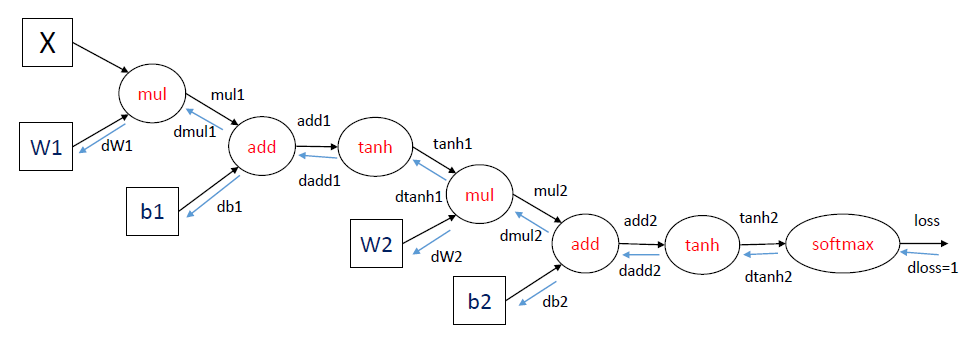

In [14]:
from IPython.display import Image
Image("computation-graph.png")

In [15]:
# Building graph
X = tf.placeholder(tf.float32, (None,4), name='input_features')
y = tf.placeholder(tf.float32, (None,1), name='target')
#Define Weights and Bias
W = tf.Variable(tf.random_normal((4,1)), name='Weights')
b = tf.Variable(tf.random_normal((1,)), name='Bias')
# output or prediction
#yhat = tf.matmul(X, W) + b
yhat = tf.add(tf.matmul(X, W), b)

### Activation function

In [16]:
prediction = tf.nn.sigmoid(yhat)

In [17]:
# # Define the accuracy
correct = tf.cast(tf.equal(prediction,y), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [18]:
### Different Activation functions

##### Sigmoid

$$
f(x)={\frac {1}{1+e^{-x}}}
$$

In [19]:
# Derivative

$$
f'(x)=f(x)(1-f(x))
$$

#### Rectified Linear Units, ReLU

$$
f(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            x & for & x > 0
        \end{array}
    \right.
$$

In [20]:
## Derivative

$$
f'(x) = \left\{
        \begin{array}{lll}
            0 & for & x \leq 0  \\
            1 & for & x > 0
        \end{array}
    \right.
$$

### backpropagation

In [21]:
###Loss (Cost) Function [Mean square error]
#loss = tf.reduce_mean(tf.square(yhat-y),name='Loss')# backpropagation

- Forward propagation:

          ```
          Z1 = W1A0 + b1    # A0 is X
          A1 = g1(Z1)
          Z2 = W2A1 + b2
          A2 = Sigmoid(Z2)      # Sigmoid because the output is between 0 and 1
          ```

- Backpropagation (derivations):   

          ```
          dZ2 = A2 - Y      # derivative of cost function we used * derivative of the sigmoid function
          dW2 = (dZ2 * A1.T) / m
          db2 = Sum(dZ2) / m
          dZ1 = (W2.T * dZ2) * g'1(Z1)  # element wise product (*)
          dW1 = (dZ1 * A0.T) / m   # A0 = X
          db1 = Sum(dZ1) / m
          # there are transposes with multiplication because to keep dimensions correct

    Make a forward pass
    Calculate the error
    Make backward pass (backpropagation)

In the first step, backprop uses the data and the weights of the network to compute a prediction. Next, the error is computed based on the prediction and the provided labels. The final step propagates the error through the network, starting from the final layer. Thus, the weights get updated based on the error, little by little.

##### mathematical concept of Chain rule and delta are useful for knowing the backpropagation

### Cross-entropy 

In [22]:
import numpy as np

In [23]:
#loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=yhat, labels=y))
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=yhat, labels=y)) #tf.nn.softmax

cross entropy between two probability distributions of `target` and `predicted` .
loss function is lower level and describes how a single instance or component determines an error value, whilst a cost function is higher level and describes how a complete system is evaluated for optimisation. 

In [24]:
def cross_entropy(predictions, targets, epsilon=1e-12):

    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

predictions = np.array([[0.25,0.25,0.25,0.25],
                        [0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],
                   [0,0,0,1]])

x = cross_entropy(predictions, targets)
print(x)

0.7135581778200729


#### Set neural network hyperparameters

In [25]:
# Define the learning rate， batch_size etc.
learning_rate = 0.001
iter_num = 500

### Optimizers

In [26]:
### Define the optimizer to minimize the loss
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
#train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#### different nets
    net_SGD         = Net(tf.train.GradientDescentOptimizer)
    net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
    net_RMSprop     = Net(tf.train.RMSPropOptimizer)
    net_Adam        = Net(tf.train.AdamOptimizer)
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

## Gradient Descent
Gradient descent is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.

It works by having the model make predictions on training data and using the error on the predictions to update the model in such a way as to reduce the error.

The goal of the algorithm is to find model parameters (e.g. coefficients or weights) that minimize the error of the model on the training dataset. It does this by making changes to the model that move it along a gradient or slope of errors down toward a minimum error value. This gives the algorithm its name of “gradient descent.”
##### Three types
    1. batch #entire training dataset in memory
    2. stochastic #higher variance, computationally expensive
    3. mini-batch.

    ## Hyperameters of mini-batch
    learning_rate = 0.001
    batch_size = 512
    iter_num = 15001

        with tf.Session() as sess:
            sess.run(init)
            for epoch in range(iter_num):
                _, c = sess.run([optimizer, cost], feed_dict={X: batch_data, Y:batch_labels})

In [27]:
# variables need to be initialized before we can use them
init_op = tf.global_variables_initializer()

In [28]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [29]:
# Create a summary to monitor cost tensor
tf.summary.scalar("loss",loss)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", accuracy)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

In [30]:
with tf.Session() as sess:
    sess.run(init_op)

    for epoch in range(iter_num):
        _, weights, bias, l,summary = sess.run([train_op, W, b, loss, merged_summary_op], feed_dict={X:X_train, y:y_train})

        if epoch % 50 == 0:
            print((epoch, weights.T[0], bias[0], l))
        temp_loss = sess.run(loss, feed_dict={X: X_train,y:y_train})
        temp_train_acc = sess.run(accuracy, feed_dict={X: X_train,y: y_train})
        temp_test_acc = sess.run(accuracy, feed_dict={X: X_test,y: y_test})
        # recode the result
        loss_trace.append(temp_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)

        # Calculate the correct predictions
        correct_prediction = tf.to_float(tf.greater(prediction, 0.5))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.to_float(tf.equal(y, correct_prediction)))

    print ("Train Accuracy:", accuracy.eval({X: X_train, y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, y: y_test}))    

(0, array([ 0.8891905 ,  0.00352207, -0.72783023,  0.6804361 ], dtype=float32), -0.64299566, 1.6336833)
(50, array([ 0.80779076, -0.02593751, -0.73011214,  0.6699692 ], dtype=float32), -0.6532411, 1.4791898)
(100, array([ 0.7292917 , -0.05176447, -0.7319424 ,  0.6600036 ], dtype=float32), -0.6624895, 1.3385731)
(150, array([ 0.6544653 , -0.07340217, -0.7332511 ,  0.6506465 ], dtype=float32), -0.67059, 1.2138166)
(200, array([ 0.58416486, -0.09037855, -0.7339776 ,  0.6420134 ], dtype=float32), -0.677409, 1.1064253)
(250, array([ 0.51927406, -0.10236996, -0.734077  ,  0.6342175 ], dtype=float32), -0.6828449, 1.0171484)
(300, array([ 0.46062556, -0.10925598, -0.7335277 ,  0.6273531 ], dtype=float32), -0.68684375, 0.94575614)
(350, array([ 0.40887585, -0.1111603 , -0.73233634,  0.6214757 ], dtype=float32), -0.6894132, 0.89091)
(400, array([ 0.36435127, -0.10846929, -0.73054147,  0.6165836 ], dtype=float32), -0.6906296, 0.8502299)
(450, array([ 0.32692435, -0.10181039, -0.72821033,  0.61261

### Multilayer Neural Network

A 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TensorFlow. 
This example is using some of TensorFlow higher-level wrappers (tf.estimators, tf.layers, tf.metrics, ...)

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [31]:
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### Set neural network hyperparameters

In [33]:
lr = 0.1
epochs = 10
batch_size = 128
weight_initializer = tf.contrib.layers.xavier_initializer()

#### Set number of neurons for each layer

In [34]:
n_input = 784 #28*28
n_dense_1 = 64
n_dense_2 = 64
n_classes = 10

#### Define placeholders Tensors for inputs and labels

In [35]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [36]:
# dense layer with ReLU activation:
def dense(x, W, b):
    z = tf.add(tf.matmul(x, W), b)
    a = tf.nn.relu(z)
    return a

In [37]:
bias_dict = {
    'b1': tf.Variable(tf.zeros([n_dense_1])),
    'b2': tf.Variable(tf.zeros([n_dense_2])),
    'b_out': tf.Variable(tf.zeros([n_classes]))
}

weight_dict = {
    'W1': tf.get_variable('W1', [n_input, n_dense_1], initializer=weight_initializer),
    'W2': tf.get_variable('W2', [n_dense_1, n_dense_2], initializer=weight_initializer),
    'W_out': tf.get_variable('W_out', [n_dense_2, n_classes], initializer=weight_initializer),
}

### Multilayer architecture

In [38]:
def network(x, weights, biases):
    
    # two dense hidden layers:
    dense_1 = dense(x, weights['W1'], biases['b1'])
    dense_2 = dense(dense_1, weights['W2'], biases['b2'])
    
    # linear output layer (softmax):
    out_layer_z = tf.add(tf.matmul(dense_2, weights['W_out']), biases['b_out'])
    
    return out_layer_z

#### Build model

In [39]:
predictions = network(x, weights=weight_dict, biases=bias_dict)

#### Entropy

In [40]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### Optimizer

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

In [42]:
# calculate accuracy by identifying test cases where the model's highest-probability class matches the true y label: 
correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
accuracy_pct = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) * 100

In [43]:
initializer_op = tf.global_variables_initializer()

In [44]:
with tf.Session() as session:
    session.run(initializer_op)
    
    print("Training for", epochs, "epochs.")
    
    # loop over epochs: 
    for epoch in range(epochs):
        
        avg_cost = 0.0 # track cost to monitor performance during training
        avg_accuracy_pct = 0.0
        
        # loop over all batches of the epoch:
        n_batches = int(mnist.train.num_examples / batch_size)
        for i in range(n_batches):
            
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # feed batch data to run optimization and fetching cost and accuracy: 
            _, batch_cost, batch_acc = session.run([optimizer, cost, accuracy_pct], feed_dict={x: batch_x, y: batch_y})
            
            # accumulate mean loss and accuracy over epoch: 
            avg_cost += batch_cost / n_batches
            avg_accuracy_pct += batch_acc / n_batches
            
        # output logs at end of each epoch of training:
        print("Epoch ", '%03d' % (epoch+1), 
              ": cost = ", '{:.3f}'.format(avg_cost), 
              ", accuracy = ", '{:.2f}'.format(avg_accuracy_pct), "%", 
              sep='')
    
    print("Training Complete. Testing Model.\n")
    
    test_cost = cost.eval({x: mnist.test.images, y: mnist.test.labels})
    test_accuracy_pct = accuracy_pct.eval({x: mnist.test.images, y: mnist.test.labels})
    
    print("Test Cost:", '{:.3f}'.format(test_cost))
    print("Test Accuracy: ", '{:.2f}'.format(test_accuracy_pct), "%", sep='')

Training for 10 epochs.
Epoch 001: cost = 0.496, accuracy = 85.92%
Epoch 002: cost = 0.240, accuracy = 93.08%
Epoch 003: cost = 0.187, accuracy = 94.66%
Epoch 004: cost = 0.153, accuracy = 95.59%
Epoch 005: cost = 0.131, accuracy = 96.26%
Epoch 006: cost = 0.114, accuracy = 96.72%
Epoch 007: cost = 0.100, accuracy = 97.07%
Epoch 008: cost = 0.089, accuracy = 97.42%
Epoch 009: cost = 0.082, accuracy = 97.63%
Epoch 010: cost = 0.074, accuracy = 97.85%
Training Complete. Testing Model.

Test Cost: 0.095
Test Accuracy: 97.18%


In [45]:
### Recap

#### Graph => Function => Activation Fn =>Forward/Backward => Cross Entropy => Optimzer => Hyperparameter =>training

In [46]:
## Next multilayer network and deep learning architechture

##### 1.  tf.estimator(), tf.layers()a higher lavel tensorflow API
https://www.tensorflow.org/guide/extend/architecture

##### 2. CNN, RNN, LSTM using Keras